### This is Owen Monroe's Notebook for IS 567 Text Mining for the Project Progress Report
This notebook evaluates NER models and tagging, comparing the spacy NER model to my own hand-annotated data. The text data comes from downloaded files from the Hathi-Trust Digital Library. These texts are 19th Century Magazines from the publishers, The Society for the Diffusion of Useful Knowledge, the William and Robert Chambers, and the Society for the Diffusion of General and Christian Knowledge among the Chinese. 

In [1]:
# Loading the Spacy Model

import spacy



In [2]:
nlp = spacy.load('en_core_web_sm')

Document 1 Comparison: Clipping from Chambers's 'Information for the People' 1835 selection about France


In [3]:
with open("Useful_Knowledge_Texts/Clipped_Texts/Chambers_InfoForPeople_France_1835.txt", "r", encoding="utf-8") as text_file:
    text = text_file.read()

In [4]:
doc = nlp(text)

In [5]:
hand_annotated_data = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_InfoForPeople_France_1835.txt.tsv", "r", encoding="utf-8") as iob_file:
    for line in iob_file:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data.append((token, label))



In [6]:
hand_annotated_data


[('he', 'O'),
 ('principal', 'O'),
 ('mountains', 'O'),
 ('of', 'O'),
 ('France', 'B-GPE'),
 ('are', 'O'),
 (',', 'O'),
 ('1', 'B-CARDINAL'),
 ('.', 'O'),
 ('The', 'O'),
 ('Toeget', 'O'),
 ('on', 'O'),
 ('the', 'O'),
 ('north', 'O'),
 ('-', 'O'),
 ('east', 'O'),
 ('.', 'O'),
 ('They', 'O'),
 ('are', 'O'),
 ('of', 'O'),
 ('a', 'O'),
 ('rounded', 'O'),
 ('oat', 'O'),
 ('-', 'O'),
 ('Bne', 'O'),
 (',', 'O'),
 ('with', 'O'),
 ('gentle', 'O'),
 ('slopes', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('afford', 'O'),
 ('much', 'O'),
 ('open', 'O'),
 ('paa', 'O'),
 ('-', 'O'),
 ('turage', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('highest', 'O'),
 ('summit', 'O'),
 ('is', 'O'),
 ('not', 'O'),
 ('more', 'O'),
 ('than', 'O'),
 ('4500', 'B-QUANTITY'),
 ('ftet', 'O'),
 ('nigh', 'O'),
 ('.', 'O'),
 ('2', 'O'),
 ('.', 'O'),
 ('The', 'O'),
 ('Jura', 'B-LOC'),
 ('mountains', 'I-LOC'),
 ('He', 'O'),
 ('to', 'O'),
 ('the', 'O'),
 ('south', 'O'),
 ('of', 'O'),
 ('these', 'O'),
 (',', 'O'),
 ('and', 'O'),
 ('their', 'O'

In [7]:
len(hand_annotated_data)

2990

In [8]:
hand_annotated_tagged = [(token, label) for token, label in hand_annotated_data if label != 'O']

In [9]:
hand_annotated_tagged

[('France', 'B-GPE'),
 ('1', 'B-CARDINAL'),
 ('4500', 'B-QUANTITY'),
 ('Jura', 'B-LOC'),
 ('mountains', 'I-LOC'),
 ('0000', 'B-QUANTITY'),
 ('Daaphlny', 'B-GPE'),
 ('Provence', 'B-GPE'),
 ('mountains', 'B-LOC'),
 ('of', 'I-LOC'),
 ('Auvergne', 'I-LOC'),
 ('Puy', 'B-LOC'),
 ('de', 'I-LOC'),
 ('Dome', 'I-LOC'),
 ('Moots', 'B-LOC'),
 ("d'Or", 'I-LOC'),
 ('Mont', 'B-LOC'),
 ('Lozcre', 'I-LOC'),
 ('510', 'B-QUANTITY'),
 ('Pyrenees', 'B-LOC'),
 ('France', 'B-GPE'),
 ('Spain', 'B-GPE'),
 ('Rhine', 'B-LOC'),
 ('Seine', 'B-LOC'),
 ('Loire', 'B-LOC'),
 ('Garonne', 'B-LOC'),
 ('Adour', 'B-LOC'),
 ('Pyrenees', 'B-LOC'),
 ('Bayonne', 'B-LOC'),
 ('Marne', 'B-LOC'),
 ('Oise', 'B-LOC'),
 ('Seine', 'B-LOC'),
 ('Loire', 'B-LOC'),
 ('Sarthe', 'B-LOC'),
 ('Maycnne', 'B-LOC'),
 ('Loire', 'B-LOC'),
 ('Rhone', 'B-LOC'),
 ('Saoue', 'B-LOC'),
 ('Isire', 'B-LOC'),
 ('Durance', 'B-LOC'),
 ('Ain', 'B-LOC'),
 ('Sorgue', 'B-LOC'),
 ('Tarn', 'B-LOC'),
 ('Dordi', 'B-LOC'),
 ('Garonne', 'B-LOC'),
 ('canals', 'B-FAC'),

In [10]:
len(hand_annotated_tagged)

645

In [11]:
for i in range(len(hand_annotated_tagged)):
    token, label = hand_annotated_tagged[i]
    if label.startswith('B-'):
        label = label[2:]  # Remove "B-"
    elif label.startswith('I-'):
        label = label[2:]  # Remove "I-"
    hand_annotated_tagged[i] = (token, label)
    hand_annotated_clean = hand_annotated_tagged

In [12]:
print(f'Hand Annotations List number = {len(hand_annotated_clean)}')
hand_annotated_clean

Hand Annotations List number = 645


[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'GPE'),
 ('Provence', 'GPE'),
 ('mountains', 'LOC'),
 ('of', 'LOC'),
 ('Auvergne', 'LOC'),
 ('Puy', 'LOC'),
 ('de', 'LOC'),
 ('Dome', 'LOC'),
 ('Moots', 'LOC'),
 ("d'Or", 'LOC'),
 ('Mont', 'LOC'),
 ('Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'GPE'),
 ('Flanders', 'GPE'),
 ('Artuis', 'GPE'),
 ('Picardy', 'GPE'),
 ('Norma

In [13]:
spacy_annotations = [(ent.text, ent.label_) for ent in doc.ents]

In [14]:
print(f'Spacy Annotations List number = {len(spacy_annotations)}')
spacy_annotations


Spacy Annotations List number = 294


[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('The \n Toeget', 'ORG'),
 ('2', 'CARDINAL'),
 ('0000 \n feet', 'QUANTITY'),
 ('3', 'CARDINAL'),
 ('Alpine', 'ORG'),
 ('Daaphlny \n ', 'ORG'),
 ('Provence', 'GPE'),
 ('4', 'CARDINAL'),
 ('Auvergne', 'GPE'),
 ('the Puy de Dome', 'FAC'),
 ('the \n Cental', 'ORG'),
 ('5', 'CARDINAL'),
 ('0', 'CARDINAL'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('four', 'CARDINAL'),
 ('Rhine', 'GPE'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('the \n Garonne', 'LOC'),
 ('Marne', 'PERSON'),
 ('Oise', 'PERSON'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('Maycnne', 'PERSON'),
 ('Loire', 'ORG'),
 ('Rhone', 'ORG'),
 ('Saoue', 'ORG'),
 ('Durance', 'ORG'),
 ('Ain', 'PERSON'),
 ('Garonne', 'LOC'),
 ('France', 'GPE'),
 ('Normandy', 'PERSON'),
 ('the Isle \n of', 'ORG'),
 ('France', 'GPE'),
 ('about \n 18,I70,51>0 acres', 'QUANTITY'),
 ('7)054,501 acres', 'QUANTITY'),
 ('Languedoc', 'ORG'),
 ('Limarne', 'PERSON'),
 ('Auvergne', 'GPE'),
 ('one', 'CARDINAL'),
 ('twenty feet',

In [15]:
ground_truth_set = set(hand_annotated_clean)
spacy_predictions_set = set(spacy_annotations)

true_positives = ground_truth_set.intersection(spacy_predictions_set)

num_true_positives = len(true_positives)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives}")
print()

for entity in true_positives:
    print(f"True Positive: {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 63

True Positive: ('1370', 'DATE')
True Positive: ('Garonne', 'LOC')
True Positive: ('Spain', 'GPE')
True Positive: ('Caroline', 'PERSON')
True Positive: ('11113', 'DATE')
True Positive: ('Paris', 'GPE')
True Positive: ('1820', 'DATE')
True Positive: ('47,383', 'CARDINAL')
True Positive: ('1836', 'DATE')
True Positive: ('45,075,030', 'CARDINAL')
True Positive: ('1550', 'DATE')
True Positive: ('Tours', 'GPE')
True Positive: ('1547', 'DATE')
True Positive: ('John', 'PERSON')
True Positive: ('1814', 'DATE')
True Positive: ('Auvergne', 'GPE')
True Positive: ('233,770', 'CARDINAL')
True Positive: ('Provence', 'GPE')
True Positive: ('1813', 'DATE')
True Positive: ('Dupin', 'PERSON')
True Positive: ('1285', 'DATE')
True Positive: ('1780', 'DATE')
True Positive: ('French', 'NORP')
True Positive: ('2,500,000', 'CARDINAL')
True Positive: ('Philip', 'PERSON')
True Positive: ('Charles', 'PERSON')
True Positive:

In [16]:
false_negatives = ground_truth_set.difference(spacy_predictions_set)

num_false_negatives = len(false_negatives)
print('False Negatives are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives}")
print()

for entity in false_negatives:
    print(f"False Negative : {entity}")


False Negatvies are present in hand truth but not spacy predictions
Number of False Negatives: 369

False Negative : ('987', 'DATE')
False Negative : ('veasels', 'FAC')
False Negative : ('barley', 'PRODUCT')
False Negative : ('3', 'QUANTITY')
False Negative : ('1610', 'DATE')
False Negative : ('Saoue', 'LOC')
False Negative : ('days', 'EVENT')
False Negative : ('oats', 'PRODUCT')
False Negative : ('3,334,005', 'MONEY')
False Negative : ('kilogrammes', 'QUANTITY')
False Negative : ('L', 'PERSON')
False Negative : ('horsMs', 'PRODUCT')
False Negative : ('Bourbons', 'NORP')
False Negative : ('Ganges', 'GPE')
False Negative : ('ciennes', 'GPE')
False Negative : ('Branch', 'PERSON')
False Negative : ('wine', 'PRODUCT')
False Negative : ('IIL', 'PERSON')
False Negative : ('Dordi', 'LOC')
False Negative : ('Isle', 'GPE')
False Negative : ('VIII', 'PERSON')
False Negative : ('Artois', 'PERSON')
False Negative : ('Seine', 'LOC')
False Negative : ('/', 'PERSON')
False Negative : ('Bretagne', 'LO

In [17]:
false_positives = spacy_predictions_set.difference(ground_truth_set)


num_false_positives = len(false_positives)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives}")
print()

for entity in false_positives:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 183

False Positive : ('3', 'CARDINAL')
False Positive : ('only 50,000,000', 'CARDINAL')
False Positive : ('the constitution \n ', 'LAW')
False Positive : ('1407 3', 'DATE')
False Positive : ('Henry IV', 'PERSON')
False Positive : ('7)054,501 acres', 'QUANTITY')
False Positive : ('103,050,000', 'CARDINAL')
False Positive : ("337,0tW,'i00 francs", 'MONEY')
False Positive : ('Louie \n XVI', 'PERSON')
False Positive : ('more than \n ', 'CARDINAL')
False Positive : ('Anjou', 'GPE')
False Positive : ('Junipers', 'ORG')
False Positive : ('133a', 'CARDINAL')
False Positive : ('38,000,000 kilogrammes', 'QUANTITY')
False Positive : ('Louis XVI', 'PERSON')
False Positive : ('2', 'CARDINAL')
False Positive : ('the Puy de Dome', 'FAC')
False Positive : ('0', 'CARDINAL')
False Positive : ('about 51,600,000', 'CARDINAL')
False Positive : ('Ain', 'PERSON')
False Positive : ('Charles VI', 'PERSON')
False Positi

In [18]:
rec_calc = num_true_positives / (num_true_positives + num_false_negatives)
prec_calc = num_true_positives / (num_true_positives + num_false_positives)
f1_calc = (2 * prec_calc * rec_calc) / (prec_calc + rec_calc)

print('Evaluation Calculation Reports')
print()
print(f'Recall Score = {rec_calc}')
print(f'Precision Score = {prec_calc}')
print(f'F1 Score = {f1_calc}')


Evaluation Calculation Reports

Recall Score = 0.14583333333333334
Precision Score = 0.25609756097560976
F1 Score = 0.18584070796460178


In [19]:
# Clipping Annotation Lists to Evaluate (?)

hand_subset = hand_annotated_clean[:200]
spacy_subset = spacy_annotations[:200]
spacy_subset

[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('The \n Toeget', 'ORG'),
 ('2', 'CARDINAL'),
 ('0000 \n feet', 'QUANTITY'),
 ('3', 'CARDINAL'),
 ('Alpine', 'ORG'),
 ('Daaphlny \n ', 'ORG'),
 ('Provence', 'GPE'),
 ('4', 'CARDINAL'),
 ('Auvergne', 'GPE'),
 ('the Puy de Dome', 'FAC'),
 ('the \n Cental', 'ORG'),
 ('5', 'CARDINAL'),
 ('0', 'CARDINAL'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('four', 'CARDINAL'),
 ('Rhine', 'GPE'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('the \n Garonne', 'LOC'),
 ('Marne', 'PERSON'),
 ('Oise', 'PERSON'),
 ('Seine', 'PERSON'),
 ('Loire', 'ORG'),
 ('Maycnne', 'PERSON'),
 ('Loire', 'ORG'),
 ('Rhone', 'ORG'),
 ('Saoue', 'ORG'),
 ('Durance', 'ORG'),
 ('Ain', 'PERSON'),
 ('Garonne', 'LOC'),
 ('France', 'GPE'),
 ('Normandy', 'PERSON'),
 ('the Isle \n of', 'ORG'),
 ('France', 'GPE'),
 ('about \n 18,I70,51>0 acres', 'QUANTITY'),
 ('7)054,501 acres', 'QUANTITY'),
 ('Languedoc', 'ORG'),
 ('Limarne', 'PERSON'),
 ('Auvergne', 'GPE'),
 ('one', 'CARDINAL'),
 ('twenty feet',

In [20]:
hand_subset

[('France', 'GPE'),
 ('1', 'CARDINAL'),
 ('4500', 'QUANTITY'),
 ('Jura', 'LOC'),
 ('mountains', 'LOC'),
 ('0000', 'QUANTITY'),
 ('Daaphlny', 'GPE'),
 ('Provence', 'GPE'),
 ('mountains', 'LOC'),
 ('of', 'LOC'),
 ('Auvergne', 'LOC'),
 ('Puy', 'LOC'),
 ('de', 'LOC'),
 ('Dome', 'LOC'),
 ('Moots', 'LOC'),
 ("d'Or", 'LOC'),
 ('Mont', 'LOC'),
 ('Lozcre', 'LOC'),
 ('510', 'QUANTITY'),
 ('Pyrenees', 'LOC'),
 ('France', 'GPE'),
 ('Spain', 'GPE'),
 ('Rhine', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Garonne', 'LOC'),
 ('Adour', 'LOC'),
 ('Pyrenees', 'LOC'),
 ('Bayonne', 'LOC'),
 ('Marne', 'LOC'),
 ('Oise', 'LOC'),
 ('Seine', 'LOC'),
 ('Loire', 'LOC'),
 ('Sarthe', 'LOC'),
 ('Maycnne', 'LOC'),
 ('Loire', 'LOC'),
 ('Rhone', 'LOC'),
 ('Saoue', 'LOC'),
 ('Isire', 'LOC'),
 ('Durance', 'LOC'),
 ('Ain', 'LOC'),
 ('Sorgue', 'LOC'),
 ('Tarn', 'LOC'),
 ('Dordi', 'LOC'),
 ('Garonne', 'LOC'),
 ('canals', 'FAC'),
 ('France', 'GPE'),
 ('Flanders', 'GPE'),
 ('Artuis', 'GPE'),
 ('Picardy', 'GPE'),
 ('Norma

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [label for token, label in hand_subset]
y_pred = [label for token, label in spacy_subset]

prec_score_micro = precision_score(y_true, y_pred, average='micro')
prec_score_weighted = precision_score(y_true, y_pred, average='weighted')

rec_score_micro = recall_score(y_true, y_pred, average='micro')
rec_score_weighted = recall_score(y_true, y_pred, average='weighted')

f1_score_micro = f1_score(y_true, y_pred, average='micro')
f1_score_weighted = f1_score(y_true, y_pred, average='weighted')



print("EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro}')
print(f'Weighted F1 score for subsets = {f1_score_weighted}')
print()

EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.07
Weighted PRECISION score for subsets = 0.15195479641131815

Micro RECALL score for subsets = 0.07
Weighted RECALL score for subsets = 0.07

Micro F1 score for subsets = 0.07
Weighted F1 score for subsets = 0.06034669303984669



/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


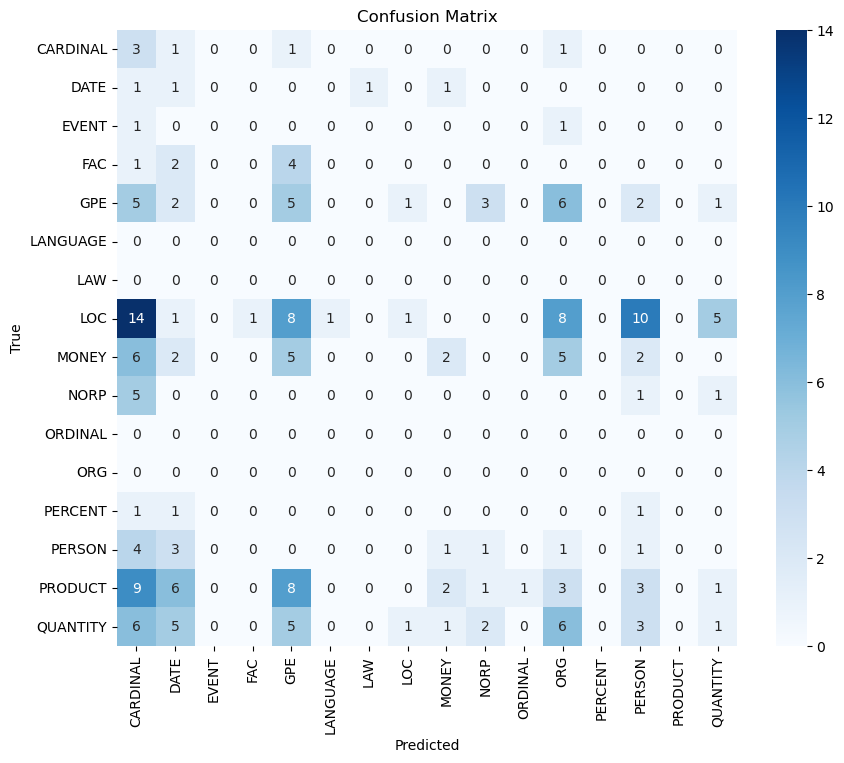

In [22]:
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



labels = sorted(list(set(y_true + y_pred)))


conf_matrix = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Document 2 Comparison: Clipping from Chambers's Journal 1839


In [41]:
# Loading and Cleaning Hand Annotations

hand_annotated_data_2 = []
with open("Useful_Knowledge_Annotations_iob_3/DOCUMENT-omonroe2_illinois_edu/Chambers_Journal_literature_Jan26_1839.txt.tsv", "r", encoding="utf-8") as iob_file_2:
    for line in iob_file_2:
        line = line.strip()
        if line:
            token, label = line.split("\t")
           
            hand_annotated_data_2.append((token, label))

hand_annotated_tagged_2 = [(token, label) for token, label in hand_annotated_data_2 if label != 'O']

for i in range(len(hand_annotated_tagged_2)):
    token, label = hand_annotated_tagged_2[i]
    if label.startswith('B-'):
        label = label[2:]  # Remove "B-"
    elif label.startswith('I-'):
        label = label[2:]  # Remove "I-"
    hand_annotated_tagged_2[i] = (token, label)
    hand_annotated_clean_2 = hand_annotated_tagged_2

print(f'Hand Annotations List number = {len(hand_annotated_clean_2)}')
hand_annotated_clean_2

Hand Annotations List number = 269


[('EDINBURGIT', 'GPE'),
 ('CHAMBERS', 'PERSON'),
 ('WILLIAM', 'PERSON'),
 ('ROBERT', 'PERSON'),
 ('CHAMBERS', 'PERSON'),
 ('CHAMBERS', 'PERSON'),
 ('BRADBURY', 'PERSON'),
 ('EVANS', 'PERSON'),
 ('WHITEFRIARS', 'GPE'),
 ('SATURDAY', 'DATE'),
 (',', 'DATE'),
 ('JANUARY', 'DATE'),
 ('26', 'DATE'),
 (',', 'DATE'),
 ('1839', 'DATE'),
 ('THREE', 'MONEY'),
 ('HALFPENSE', 'MONEY'),
 ('meat', 'PRODUCT'),
 ('Crusoe', 'WORK_OF_ART'),
 ('Gulliver', 'WORK_OF_ART'),
 ('Waverley', 'WORK_OF_ART'),
 ('Novels', 'WORK_OF_ART'),
 ('Fielding', 'PERSON'),
 ('Smollett', 'PERSON'),
 ('Parson', 'PERSON'),
 ('Adams', 'PERSON'),
 ('Lilliputians', 'ORG'),
 ('Lilliput', 'GPE'),
 ('1728', 'DATE'),
 ('Lulliputians', 'ORG'),
 ('Mr', 'PERSON'),
 ('Gulliver', 'PERSON'),
 ('1728', 'DATE'),
 ('Caleb', 'PERSON'),
 ('Balderstone', 'PERSON'),
 ('Dalgetty', 'PERSON'),
 ('Dominie', 'PERSON'),
 ('Sampson', 'PERSON'),
 ('the', 'WORK_OF_ART'),
 ('novel', 'WORK_OF_ART'),
 ('Loch', 'LOC'),
 ('Katrine', 'LOC'),
 ('Fitzjames', 'PERS

In [25]:
# Loading Document 2
with open('Useful_Knowledge_Texts/Clipped_Texts/Chambers_Journal_literature_Jan26_1839.txt', "r", encoding="utf-8") as text_file_2:
    text_2 = text_file_2.read()

In [26]:
# Spacy Tagging Text
doc_2 = nlp(text_2)

In [42]:
spacy_annotations_2 = [(ent.text, ent.label_) for ent in doc_2.ents]

print(f'Spacy Annotations List number = {len(spacy_annotations_2)}')
spacy_annotations_2

Spacy Annotations List number = 203


[('#', 'MONEY'),
 ('1', 'CARDINAL'),
 ('17', 'MONEY'),
 ('###############################################', 'MONEY'),
 ('JO\n', 'PERSON'),
 ('ROBERT CHAMBERS', 'PERSON'),
 ('EVANS', 'PERSON'),
 ('WHITEFRIARS', 'GPE'),
 ('LONDON', 'GPE'),
 ('365', 'CARDINAL'),
 ('SATURDAY', 'DATE'),
 ('JANUARY 26, 1839', 'DATE'),
 ('THREE', 'CARDINAL'),
 ('US', 'GPE'),
 ('first', 'ORDINAL'),
 ('Crusoe', 'ORG'),
 ('Gulliver', 'PERSON'),
 ('Fielding', 'ORG'),
 ('Smollett', 'PERSON'),
 ('Parson Adams', 'PERSON'),
 ('a few years ago', 'DATE'),
 ('Lilliputians', 'NORP'),
 ('Brobdignagians', 'NORP'),
 ('Lilliput', 'FAC'),
 ('Lulliputians', 'NORP'),
 ('twenty-five years', 'DATE'),
 ('Blunder', 'ORG'),
 ('only inches', 'QUANTITY'),
 ('one', 'CARDINAL'),
 ('two', 'CARDINAL'),
 ('12', 'CARDINAL'),
 ('1728', 'DATE'),
 ('Caleb Balderstone', 'PERSON'),
 ('Dugald', 'PERSON'),
 ('Andrews', 'PERSON'),
 ('Dominie Sampson', 'PERSON'),
 ('Scott', 'ORG'),
 ('Stirling\n', 'ORG'),
 ('Loch Katrine', 'PERSON'),
 ('Fitzjames', 

/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/owenmonroe/anaconda3/envs/textmining/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS

Micro PRECISION score for subsets = 0.17
Weighted PRECISION score for subsets = 0.17011307117004268

Micro RECALL score for subsets = 0.17
Weighted RECALL score for subsets = 0.17

Micro F1 score for subsets = 0.17
Weighted F1 score for subsets = 0.16601620361063085



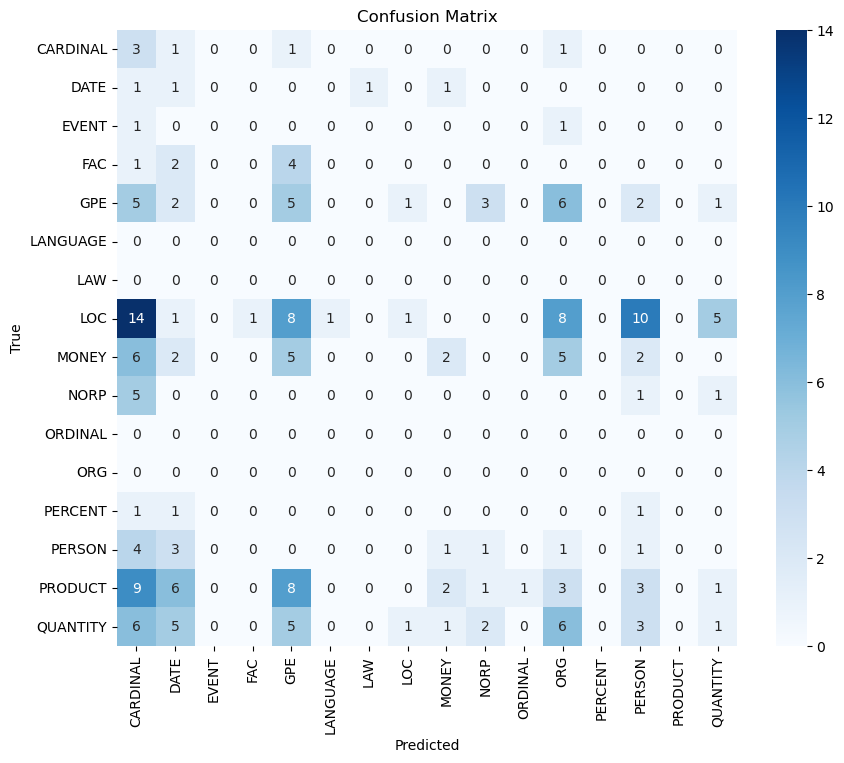

In [45]:
# Subsetting to Evaluate with Classification Reports and a Confusion matrix 

hand_subset_2 = hand_annotated_clean_2[:200]
spacy_subset_2 = spacy_annotations_2[:200]

y_true_2 = [label for token, label in hand_subset_2]
y_pred_2 = [label for token, label in spacy_subset_2]

prec_score_micro_2 = precision_score(y_true_2, y_pred_2, average='micro')
prec_score_weighted_2 = precision_score(y_true_2, y_pred_2, average='weighted')

rec_score_micro_2 = recall_score(y_true_2, y_pred_2, average='micro')
rec_score_weighted_2 = recall_score(y_true_2, y_pred_2, average='weighted')

f1_score_micro_2 = f1_score(y_true_2, y_pred_2, average='micro')
f1_score_weighted_2 = f1_score(y_true_2, y_pred_2, average='weighted')



print("Doc 2 (Chambers 1839) EVALUATION REPORTS : HAND AND SPACY NER ANNOTATION SUBSETS")
print()
print(f'Micro PRECISION score for subsets = {prec_score_micro_2}')
print(f'Weighted PRECISION score for subsets = {prec_score_weighted_2}')
print()
print(f'Micro RECALL score for subsets = {rec_score_micro_2}')
print(f'Weighted RECALL score for subsets = {rec_score_weighted_2}')
print()
print(f'Micro F1 score for subsets = {f1_score_micro_2}')
print(f'Weighted F1 score for subsets = {f1_score_weighted_2}')
print()


labels_2 = sorted(list(set(y_true_2 + y_pred_2)))

conf_matrix_2 = confusion_matrix(y_true_2, y_pred_2, labels=labels_2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [46]:
# Evaluation Through Set Intersections and Differences 

ground_truth_set_2 = set(hand_annotated_clean_2)
spacy_predictions_set_2 = set(spacy_annotations_2)

true_positives_2 = ground_truth_set_2.intersection(spacy_predictions_set_2)

num_true_positives_2 = len(true_positives_2)
print('True Positives are when hand truth matches spacy predictions')
print(f"Number of True Positives: {num_true_positives}")
print()

for entity in true_positives_2:
    print(f"True Positive : {entity}")

True Positives are when hand truth matches spacy predictions
Number of True Positives: 63

True Positive: ('Leyden', 'PERSON')
True Positive: ('1728', 'DATE')
True Positive: ('Jenkinson', 'PERSON')
True Positive: ('Webster', 'PERSON')
True Positive: ('Scotland', 'GPE')
True Positive: ('Dryden', 'PERSON')
True Positive: ('Tabitha', 'PERSON')
True Positive: ('French', 'NORP')
True Positive: ('Pacific', 'LOC')
True Positive: ('Hannah', 'PERSON')
True Positive: ('Eugeniuses', 'PERSON')
True Positive: ('Smollett', 'PERSON')
True Positive: ('Italian', 'NORP')
True Positive: ('Cherry', 'PERSON')
True Positive: ('Plymouth', 'GPE')
True Positive: ('England', 'GPE')
True Positive: ('Hudibras', 'PERSON')
True Positive: ('Lovelace', 'PERSON')
True Positive: ('Herbert', 'PERSON')
True Positive: ('Hamilton', 'PERSON')
True Positive: ('Barbour', 'PERSON')
True Positive: ('Milton', 'PERSON')
True Positive: ('SATURDAY', 'DATE')
True Positive: ('Johnson', 'PERSON')
True Positive: ('London', 'GPE')
True 

In [47]:
false_negatives_2 = ground_truth_set_2.difference(spacy_predictions_set_2)

num_false_negatives_2 = len(false_negatives_2)
print('False Negatvies are present in hand truth but not spacy predictions')
print(f"Number of False Negatives: {num_false_negatives_2}")
print()

for entity in false_negatives_2:
    print(f"False Negatives : {entity}")


False Negatvies are present in hand truth but not spacy predictions
Number of False Negatives: 179

False Negatives: ('Lord', 'PERSON')
False Negatives: ('French', 'FAC')
False Negatives: ('Lane', 'PERSON')
False Negatives: ('Baker', 'PERSON')
False Negatives: ('BRADBURY', 'PERSON')
False Negatives: ('THREE', 'MONEY')
False Negatives: ('Christian', 'WORK_OF_ART')
False Negatives: ('Crusoe', 'WORK_OF_ART')
False Negatives: ('professors', 'ORG')
False Negatives: ('OF', 'WORK_OF_ART')
False Negatives: ('fictions', 'WORK_OF_ART')
False Negatives: ('English', 'ORG')
False Negatives: ('poets', 'ORG')
False Negatives: ('Crusoe', 'PERSON')
False Negatives: ('Rembrandt', 'PERSON')
False Negatives: ('else', 'GPE')
False Negatives: ('Bower', 'LOC')
False Negatives: ('cottages', 'LOC')
False Negatives: ('Brown', 'PERSON')
False Negatives: ('New', 'GPE')
False Negatives: ('Mr', 'PERSON')
False Negatives: ('Bagdad', 'GPE')
False Negatives: ('hundred', 'MONEY')
False Negatives: ('works', 'PRODUCT')
F

In [48]:
false_positives_2 = spacy_predictions_set_2.difference(ground_truth_set_2)


num_false_positives_2 = len(false_positives_2)
print('False Positives are predicted by spacy but are not in hand truth')
print(f"Number of False Positives: {num_false_positives}")
print()

for entity in false_positives_2:
    print(f"False Positive : {entity}")


False Positives are predicted by spacy but are not in hand truth
Number of False Positives: 183

False Positive : ('The summer months', 'DATE')
False Positive : ('Beau Tibbs', 'PERSON')
False Positive : ('THREE', 'CARDINAL')
False Positive : ('3', 'CARDINAL')
False Positive : ('Sweet', 'PERSON')
False Positive : ('hour', 'TIME')
False Positive : ('Orange Bower', 'LOC')
False Positive : ('Carwell\n', 'ORG')
False Positive : ('hundred', 'CARDINAL')
False Positive : ('2', 'CARDINAL')
False Positive : ('Miss Emily', 'PERSON')
False Positive : ('Haroun', 'GPE')
False Positive : ('Molly', 'GPE')
False Positive : ('the last century', 'DATE')
False Positive : ('Loch Katrine', 'PERSON')
False Positive : ("Cowper's Task", 'ORG')
False Positive : ('Scott', 'ORG')
False Positive : ('Rose', 'PERSON')
False Positive : ('Liddel', 'ORG')
False Positive : ('12', 'CARDINAL')
False Positive : ('five minutes', 'TIME')
False Positive : ('Locke and Mrs Chapone', 'WORK_OF_ART')
False Positive : ('#', 'MONEY'

In [49]:
rec_calc_2 = num_true_positives_2 / (num_true_positives_2 + num_false_negatives_2)
prec_calc_2 = num_true_positives_2 / (num_true_positives_2 + num_false_positives_2)
f1_calc_2 = (2 * prec_calc_2 * rec_calc_2) / (prec_calc_2 + rec_calc_2)

print('Evaluation Calculation Reports')
print()
print(f'Recall Score = {rec_calc_2}')
print(f'Precision Score = {prec_calc_2}')
print(f'F1 Score = {f1_calc_2}')


Evaluation Calculation Reports

Recall Score = 0.1712962962962963
Precision Score = 0.22839506172839505
F1 Score = 0.19576719576719578


In [ ]:
# Work x 10 for spacy and the NERs, average scores (prec, rec, f1, trues, falses for all of these)
# Some Nulls experiments 

